In [192]:
import pandas as pd  # importing pandas to analyse Panel or tablur data

In [193]:
dataset = pd.read_csv("Placement.csv")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [194]:
dataset.drop("sl_no",inplace=True,axis=1) # Since Sl_no doesn't give any valid info, hence dropping it from table

In [195]:
dataset.isnull().sum() # Checking if Null value present in the dataset - only Salary has Null 

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

### <font color = 'Red'> 1. Replace the NaN values with correct value. And justify why you have chosen the same.<font/>

 If you look at the dataset of Status and Salary, if "Not placed" then the student not getting salary. Hence we can replace   with '0' which makes the column quantitative, meaningful and remove NaN value.
 
 A) Replace with CT (Mean, median, Mode) won't be an optimal solution as it may give some number for the students "Not  
     placed".
 
 B) Since we have 67 odd students records, hence deleting will loose the potential students records whoever "Not placed"
 
 C) Considering as Semi supervised learning and predict Salary based on X variables will again be part of A condition.

In [196]:
dataset["salary"].fillna(0,inplace=True)  # Replacing NaN with 0's 

In [197]:
dataset.isnull().sum() # now check if Null present in the table

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

### <font color = 'Red'> 2) How many of them are not placed? <font/>

    67 Studends haven't placed

In [198]:
#dataset["status"].value_counts()
a = dataset["status"] == "Not Placed"
a.value_counts()

status
False    148
True      67
Name: count, dtype: int64

### <font color = 'Red'> 3) Find the reason for non placement from the dataset?<font/>

###### The reason behind student not placed from the dataset are as follows

-->  Student whoever obtained marks between 56 to 65 (from ssc_p to Mba_p) not being placed, hence the students score less        than 65 (from ssc_p to Mba_p) may not be a potential interest for the recruiters.  
    
-->  Even first Quartile (i.e., Q1:25%) says the same i.e., between 57 to 60 (from ssc_p to Mba_p) not being placed.

-->  Minimam passed mark students also may not be attracted by Recuirters which is between 40 to 51 (from ssc_p to Mba_p)


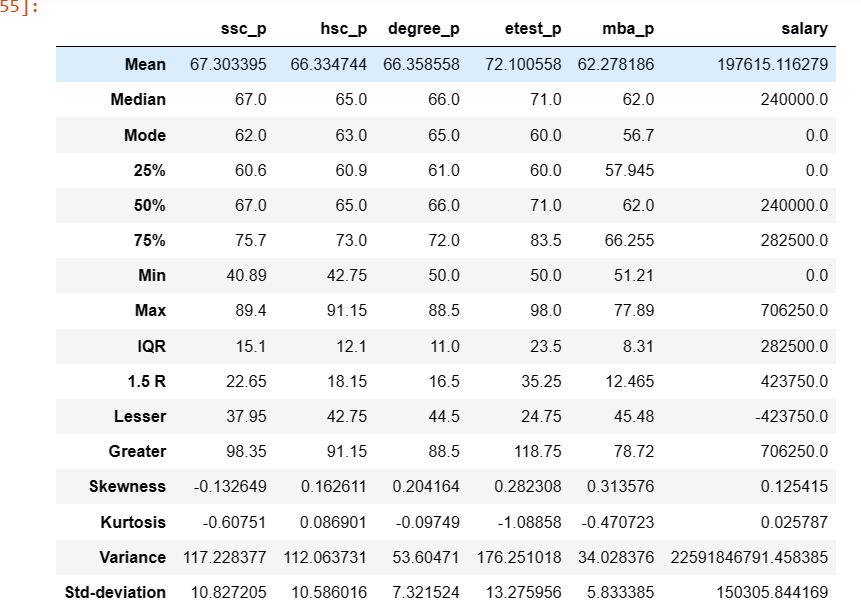

In [199]:
dataset.describe() # Querying existing table and couldn't found median, mode, outlier, hence create a custom dataframe

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [200]:
import numpy as np  # download numerical python lib to find percentile for Q1,Q2,Q3

In [201]:

uni_table = pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%","Q3:75%","Min","Max","IQR","1.5 R","Lesser","Greater"],columns=Quan)

for columnName in Quan:
    uni_table[columnName]["Mean"] = dataset[columnName].mean()
    uni_table[columnName]["Median"] = dataset[columnName].median()
    uni_table[columnName]["Mode"] = dataset[columnName].mode()[0]
    uni_table[columnName]["Q1:25%"] = np.percentile(dataset[columnName],25)
    uni_table[columnName]["Q2:50%"] = np.percentile(dataset[columnName],50)
    uni_table[columnName]["Q3:75%"] = np.percentile(dataset[columnName],75)
    uni_table[columnName]["Min"] = dataset[columnName].min()
    uni_table[columnName]["Max"] = dataset[columnName].max()
    uni_table[columnName]["IQR"] = uni_table[columnName]["Q3:75%"] - uni_table[columnName]["Q1:25%"]
    uni_table[columnName]["1.5 R"] = uni_table[columnName]["IQR"]*1.5
    uni_table[columnName]["Lesser"] = uni_table[columnName]["Q1:25%"] - uni_table[columnName]["1.5 R"]
    uni_table[columnName]["Greater"] = uni_table[columnName]["Q3:75%"] + uni_table[columnName]["1.5 R"]
uni_table

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
Median,67.0,65.0,66.0,71.0,62.0,240000.0
Mode,62.0,63.0,65.0,60.0,56.7,0.0
Q1:25%,60.6,60.9,61.0,60.0,57.945,0.0
Q2:50%,67.0,65.0,66.0,71.0,62.0,240000.0
Q3:75%,75.7,73.0,72.0,83.5,66.255,282500.0
Min,40.89,37.0,50.0,50.0,51.21,0.0
Max,89.4,97.7,91.0,98.0,77.89,940000.0
IQR,15.1,12.1,11.0,23.5,8.31,282500.0
1.5 R,22.65,18.15,16.5,35.25,12.465,423750.0


In [202]:
Lesser = []
Greater = []
for columnName in uni_table:
    if uni_table[columnName]["Min"] < uni_table[columnName]["Lesser"]:
        Lesser.append(columnName)
    if uni_table[columnName]["Max"] > uni_table[columnName]["Greater"]:
        Greater.append(columnName)

In [203]:
Lesser

['hsc_p']

In [204]:
Greater

['hsc_p', 'degree_p', 'salary']

In [205]:
for columnName in Lesser:
    dataset[columnName][dataset[columnName] < uni_table[columnName]["Lesser"]] = uni_table[columnName]["Lesser"] 
for columnName in Greater:
    dataset[columnName][dataset[columnName] > uni_table[columnName]["Greater"]] = uni_table[columnName]["Greater"] 

C:\Users\YAS\AppData\Local\Temp\ipykernel_6056\841300226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[columnName][dataset[columnName] < uni_table[columnName]["Lesser"]] = uni_table[columnName]["Lesser"]
C:\Users\YAS\AppData\Local\Temp\ipykernel_6056\841300226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[columnName][dataset[columnName] > uni_table[columnName]["Greater"]] = uni_table[columnName]["Greater"]
C:\Users\YAS\AppData\Local\Temp\ipykernel_6056\841300226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

In [206]:
uni_table = pd.DataFrame(index=["Mean","Median","Mode","25%","50%","75%","Min","Max","IQR","1.5 R","Lesser","Greater"],columns=Quan)

for columnName in Quan:
    uni_table[columnName]["Mean"] = dataset[columnName].mean()
    uni_table[columnName]["Median"] = dataset[columnName].median()
    uni_table[columnName]["Mode"] = dataset[columnName].mode()[0]
    uni_table[columnName]["25%"] = np.percentile(dataset[columnName],25)
    uni_table[columnName]["50%"] = np.percentile(dataset[columnName],50)
    uni_table[columnName]["75%"] = np.percentile(dataset[columnName],75)
    uni_table[columnName]["Min"] = dataset[columnName].min()
    uni_table[columnName]["Max"] = dataset[columnName].max()
    uni_table[columnName]["IQR"] = uni_table[columnName]["75%"] - uni_table[columnName]["25%"]
    uni_table[columnName]["1.5 R"] = uni_table[columnName]["IQR"]*1.5
    uni_table[columnName]["Lesser"] = uni_table[columnName]["25%"] - uni_table[columnName]["1.5 R"]
    uni_table[columnName]["Greater"] = uni_table[columnName]["75%"] + uni_table[columnName]["1.5 R"]
uni_table

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,67.303395,66.334744,66.358558,72.100558,62.278186,197615.116279
Median,67.0,65.0,66.0,71.0,62.0,240000.0
Mode,62.0,63.0,65.0,60.0,56.7,0.0
25%,60.6,60.9,61.0,60.0,57.945,0.0
50%,67.0,65.0,66.0,71.0,62.0,240000.0
75%,75.7,73.0,72.0,83.5,66.255,282500.0
Min,40.89,42.75,50.0,50.0,51.21,0.0
Max,89.4,91.15,88.5,98.0,77.89,706250.0
IQR,15.1,12.1,11.0,23.5,8.31,282500.0
1.5 R,22.65,18.15,16.5,35.25,12.465,423750.0


In [207]:
Lesser = []
Greater = []
for columnName in uni_table:
    if uni_table[columnName]["Min"] < uni_table[columnName]["Lesser"]:
        Lesser.append(columnName)
    if uni_table[columnName]["Max"] > uni_table[columnName]["Greater"]:
        Greater.append(columnName)

In [208]:
Lesser

[]

In [209]:
Greater

[]

In [210]:
def QuanQual():
    Quan = []
    Qual = []

    for columnName in dataset.columns:
        if dataset[columnName].dtypes == 'O':
            Qual.append(columnName)
        else:
            Quan.append(columnName)   
            
    return Quan,Qual

In [211]:
Quan,Qual = QuanQual()
Quan,Qual

(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'],
 ['gender',
  'ssc_b',
  'hsc_b',
  'hsc_s',
  'degree_t',
  'workex',
  'specialisation',
  'status'])

In [212]:
 uni_table = pd.DataFrame(index=["Mean","Median","Mode","25%","50%","75%","Min","Max","IQR","1.5 R","Lesser",
                                 "Greater","Skewness","Kurtosis","Variance","Std-deviation"],columns=Quan)

for columnName in Quan:
    uni_table[columnName]["Mean"] = dataset[columnName].mean()
    uni_table[columnName]["Median"] = dataset[columnName].median()
    uni_table[columnName]["Mode"] = dataset[columnName].mode()[0]
    uni_table[columnName]["25%"] = np.percentile(dataset[columnName],25)
    uni_table[columnName]["50%"] = np.percentile(dataset[columnName],50)
    uni_table[columnName]["75%"] = np.percentile(dataset[columnName],75)
    uni_table[columnName]["Min"] = dataset[columnName].min()
    uni_table[columnName]["Max"] = dataset[columnName].max()
    uni_table[columnName]["IQR"] = uni_table[columnName]["75%"] - uni_table[columnName]["25%"]
    uni_table[columnName]["1.5 R"] = uni_table[columnName]["IQR"]*1.5
    uni_table[columnName]["Lesser"] = uni_table[columnName]["25%"] - uni_table[columnName]["1.5 R"]
    uni_table[columnName]["Greater"] = uni_table[columnName]["75%"] + uni_table[columnName]["1.5 R"]
    uni_table[columnName]["Skewness"] = dataset[columnName].skew()
    uni_table[columnName]["Kurtosis"] = dataset[columnName].kurtosis()
    uni_table[columnName]["Variance"] = dataset[columnName].var()
    uni_table[columnName]["Std-deviation"] = dataset[columnName].std()
    
uni_table

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,67.303395,66.334744,66.358558,72.100558,62.278186,197615.116279
Median,67.0,65.0,66.0,71.0,62.0,240000.0
Mode,62.0,63.0,65.0,60.0,56.7,0.0
25%,60.6,60.9,61.0,60.0,57.945,0.0
50%,67.0,65.0,66.0,71.0,62.0,240000.0
75%,75.7,73.0,72.0,83.5,66.255,282500.0
Min,40.89,42.75,50.0,50.0,51.21,0.0
Max,89.4,91.15,88.5,98.0,77.89,706250.0
IQR,15.1,12.1,11.0,23.5,8.31,282500.0
1.5 R,22.65,18.15,16.5,35.25,12.465,423750.0


In [214]:
# Created a customized dataframe and created new set of cols
FreqTable = pd.DataFrame(columns= ["Unique_Values","Frequency","Relative_Frequency","Cumsum"])
# Unique_Values,Frequency,Relative_Frequency,Cumsum pulled from dataset and mapped to DF
FreqTable["Unique_Values"] = dataset["ssc_p"].value_counts().index
FreqTable["Frequency"] = dataset["ssc_p"].value_counts().values
FreqTable["Relative_Frequency"] = FreqTable["Frequency"]/len(FreqTable["Unique_Values"])
FreqTable["Cumsum"] = FreqTable["Relative_Frequency"].cumsum()

FreqTable.to_csv("Frequency_table.csv",index = False)
FreqTable

,Unique_Values,Frequency,Relative_Frequency,Cumsum
0,62.00,11,0.106796,0.106796
1,63.00,10,0.097087,0.203883
2,67.00,9,0.087379,0.291262
3,52.00,9,0.087379,0.378641
4,73.00,9,0.087379,0.466019
...,...,...,...,...
98,69.70,1,0.009709,2.048544
99,80.92,1,0.009709,2.058252
100,83.00,1,0.009709,2.067961
101,86.50,1,0.009709,2.077670


###  <font color = 'Red'> 4. What kind of relation between salary and mba_p? <font/>

######           14% i would say it is zero correlation (though it slightly +ve but degree of freedom can't exactly say it is +ve corr)

In [215]:
dataset[Quan].corr()   

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.513478,0.538686,0.261993,0.388478,0.558475
hsc_p,0.513478,1.000000,0.434606,0.240775,0.348452,0.459424
degree_p,0.538686,0.434606,1.000000,0.227147,0.402376,0.423762
etest_p,0.261993,0.240775,0.227147,1.000000,0.218055,0.186775
mba_p,0.388478,0.348452,0.402376,0.218055,1.000000,0.141417
salary,0.558475,0.459424,0.423762,0.186775,0.141417,1.000000


### <font color = 'Red'> 5. Which specialization is getting minimum salary? <font/>


#####        Both "Mkt&HR + Mkt&Fin" minimum salary is 2 Lac (But if replace NaN then there is greater chance to get min of '0' salary

In [216]:
print(dataset[dataset["specialisation"] == "Mkt&HR"]["salary"].min())
print(dataset[dataset["specialisation"] == "Mkt&Fin"]["salary"].min())

0.0
0.0


### <font color = 'Red'> 6. How many of them getting above 500000 salary? <font/>

  #####             Totally 3 students getting above 5 L Salary

In [217]:
Above5L = []

for i in dataset["salary"]:
    if (i > 500000.0):
        Above5L.append(i)

print(Above5L)

[706250.0, 690000.0, 650000.0]


#### <font color = 'Red'> 7. Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing) <font/>
    

### Hypothesis Report

##### Ho = There is no difference between etest_p, mba_p.                                                                  
##### H1 = There is a difference between etest_p, mba_p
Reject Null hypthoesis if Pvalue < 0.05%

Since "statistic is 98.64" hence there is significant difference between etest_p, mba_p and pvalue < 0.05% therefore (H0) Null Hypothesis rejected and Accept (H1) Alternate Hypotheis 

In [218]:
from scipy.stats import f_oneway
f_oneway(dataset["etest_p"],dataset["mba_p"])

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

#### <font color = 'Red'> 8. Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing) <font/>

### Hypothesis Report

#### Ho = There is no similarity between degree_t(Sci&Tech) and specialisation(Mkt&HR) wrt Salary                                                                 
#### H1 = There is a similarity between degree_t(Sci&Tech) and specialisation(Mkt&HR) wrt Salary  

Reject Null hypthoesis if Pvalue < 0.05%

Since "statistic is 2.69" hence there is significant similarity  between degree_t(Sci&Tech) and specialisation(Mkt&HR) wrt Salary and pvalue < 0.05% therefore (H0) Null Hypothesis rejected and Accept (H1) Alternate Hypotheis

In [219]:
from scipy.stats import ttest_ind
degree_t = dataset[dataset["degree_t"] =="Sci&Tech"] ["salary"]
specialisation = dataset[dataset["specialisation"] == "Mkt&HR"] ["salary"]

ttest_ind(degree_t,specialisation)

TtestResult(statistic=2.692041243555374, pvalue=0.007897969943471179, df=152.0)

### <font color = 'Red'> 9. Convert the normal distribution to standard normal distribution for salary column <font/>

C:\Users\YAS\AppData\Local\Temp\ipykernel_6056\972065751.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset,kde=True)


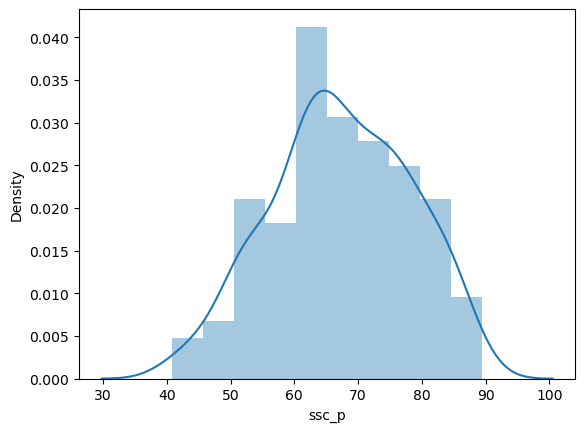

In [220]:
#created Normal distribution graph

def norm(dataset):
    import seaborn as sns
    sns.distplot(dataset,kde=True)
      
norm(dataset["ssc_p"])

C:\Users\YAS\AppData\Local\Temp\ipykernel_6056\2261635642.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(std_norm_disb,kde=True)


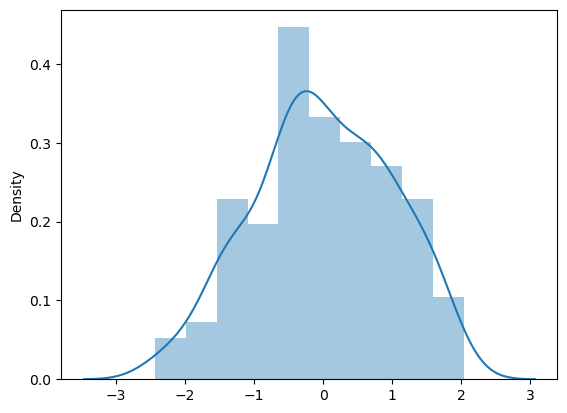

In [222]:
#conveting normal disb into standard normal disb, however the bar, line didn't change

def std_norm(dataset):
    import seaborn as sns

    mean = dataset.mean()
    std  = dataset.std()

    values = [i for i in dataset]
    std_norm_disb = [((j-mean)/std) for j in values]

    sns.distplot(std_norm_disb,kde=True)
    
    
std_norm(dataset["ssc_p"])

### <font color = 'Red'> 10. What is the probability Density Function of the salary range from 700000 to 900000?<font/>

##### probability Density Function between salary range from 700000 to 900000 is 0.0005973310593974901


C:\Users\YAS\AppData\Local\Temp\ipykernel_6056\3138112401.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='purple')


The calculated mean 197615.11627906977, and std 150305.84416934155
The area between range(700000,900000):0.0004137812663830059


0.0004137812663830059

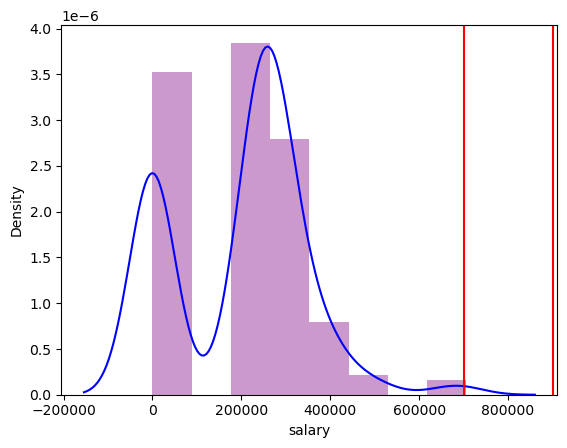

In [223]:
def get_pdf_p(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='purple')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    
    sample = dataset
    sample_mean = sample.mean()
    sample_std  = sample.std()
    #print ("The calculated mean = %.3f, and std = %.3f"%(sample_mean,sample_std))
    print ("The calculated mean {}, and std {}".format(sample_mean,sample_std))
    dist = norm(sample_mean, sample_std)
    
    values = []
    for value in range(startrange,endrange):
        values.append(value)
    
    probabilities = []
    for value in values:
        probabilities.append(dist.pdf(value))
        
   
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob 
    
    
 
get_pdf_p(dataset['salary'],700000,900000)

#### <font color = 'Red'>11.Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance    level of 5%.(Make decision using Hypothesis Testing) <font/>


### Hypothesis Report

#### Ho = There is no similarity between degree_t(Sci&Tech) wrt etest_p and mba_p                                                          
#### H1 = There is a similarity between degree_t(Sci&Tech) wrt etest_p and mba_p 

Reject Null hypthoesis if Pvalue < 0.05%

Since "statistic is 4.53" hence there is significant similarity  between degree_t(Sci&Tech) wrt etest_p and mba_p, the pvalue < 0.05% therefore (H0) Null Hypothesis rejected and Accept (H1) Alternate Hypotheis

In [224]:
from scipy.stats import ttest_ind
degree_t1 = dataset[dataset["degree_t"] =="Sci&Tech"] ["etest_p"]
degree_t2 = dataset[dataset["degree_t"] =="Sci&Tech"] ["mba_p"]

ttest_ind(degree_t1,degree_t2)

TtestResult(statistic=4.532000225151251, pvalue=1.4289217003775636e-05, df=116.0)

### <font color = 'Red'> 12. Which parameter is highly correlated with salary? <font/>

##### SSC_p is highly correlated with salary 

In [225]:
dd = dataset[Quan].corr() 
dd

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.513478,0.538686,0.261993,0.388478,0.558475
hsc_p,0.513478,1.000000,0.434606,0.240775,0.348452,0.459424
degree_p,0.538686,0.434606,1.000000,0.227147,0.402376,0.423762
etest_p,0.261993,0.240775,0.227147,1.000000,0.218055,0.186775
mba_p,0.388478,0.348452,0.402376,0.218055,1.000000,0.141417
salary,0.558475,0.459424,0.423762,0.186775,0.141417,1.000000


### <font color = 'Red'> 13. plot any useful graph and explain it <font/>

#####                                                  Nearly 56% ssc_p correlation with Salary

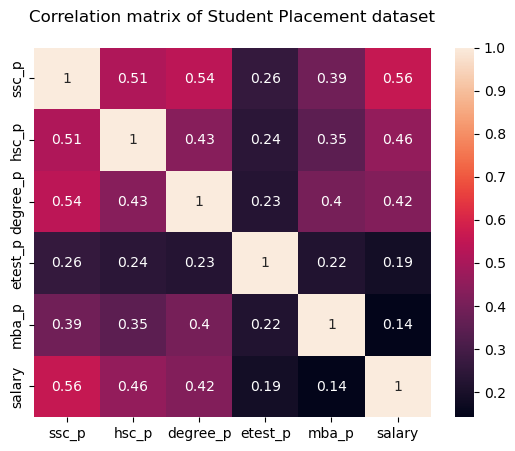

In [226]:
import seaborn as sns
import matplotlib.pyplot as pt 
heatmap = sns. heatmap(dd, annot = True)  
heatmap.set (title = "Correlation matrix of Student Placement dataset\n")  
pt. show ()  